In [4]:
import pandas as p
obj = p.read_csv('Titanic-Dataset.csv')
obj.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
obj.info()
obj.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
obj['Age'].fillna(obj['Age'].median,inplace=True)
obj.dropna(subset=['Embarked'],inplace=True)
#'Cabin' coloumn has too many missing values!
obj.drop(columns=['Cabin'],inplace=True)

<ipython-input-6-db6535c39594>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  obj['Age'].fillna(obj['Age'].median,inplace=True)


In [7]:
#converting male as 0 and female as 1 in sex column
obj['Sex'] = obj['Sex'].map({'male':0,'female':1})
obj = p.get_dummies(obj,columns=['Embarked'],drop_first = True)

In [10]:
print(obj.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [11]:
print(obj[['Age','Fare']].dtypes)

Age      object
Fare    float64
dtype: object


In [12]:
obj['Age'] = p.to_numeric(obj['Age'],errors='coerce')

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
obj[['Age','Fare']] = sc.fit_transform(obj[['Age','Fare']])

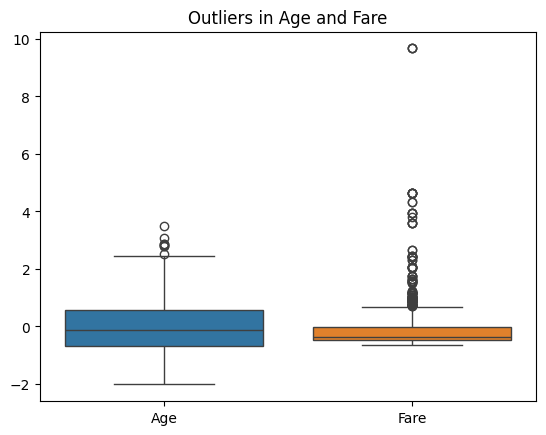

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=obj[['Age','Fare']])
plt.title("Outliers in Age and Fare")
plt.show()

In [16]:
obj=obj[obj['Fare']<obj['Fare'].quantile(0.95)]

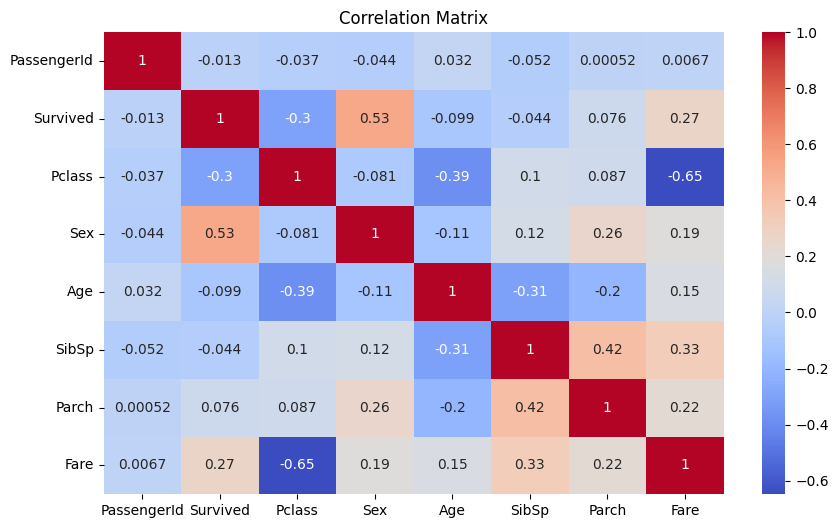

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = obj.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
obj.groupby('Sex')['Survived'].mean()

,Survived
Sex,
0,0.183274
1,0.719858


In [20]:
obj.to_csv("cleaned_titanic.csv", index=False)

In [22]:
X = obj.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = obj['Survived']

In [24]:
X=X.fillna(0)

In [25]:
X = obj.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = obj['Survived']
X = X.fillna(0)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7810650887573964
